# Neural Networks

### What is a Neural Network?


Neural networks are computer systems that try to understand patterns in data, like how our brains do. They are made up of artificial neurons that process information in layers, passing it from one layer to another. By adjusting the connections between these neurons based on examples, neural networks can learn and make predictions on new data, helping us solve problems like image recognition, language understanding, and more. Neural networks are like smart algorithms that learn from examples.

Imagine you want to teach a computer to recognize cats. You would show it lots of pictures of cats and say, "These are cats." The computer would learn to identify the patterns in the pictures that make them cats. Then, when you give it a new picture, it can tell you if it's a cat or not based on what it learned.

The cool thing is that neural networks can learn all sorts of things, not just about cats. They can learn to understand speech, translate languages, or even play games. They're powerful tools that make computers smarter and help them do all kinds of tasks that normally only humans can do.

Please keep in mind that the neural networks this notebook will be taking a look at are feedforward neural networks, which are a supervised type of neural network (there exists unsupervised neural networks as well!).

<div>
    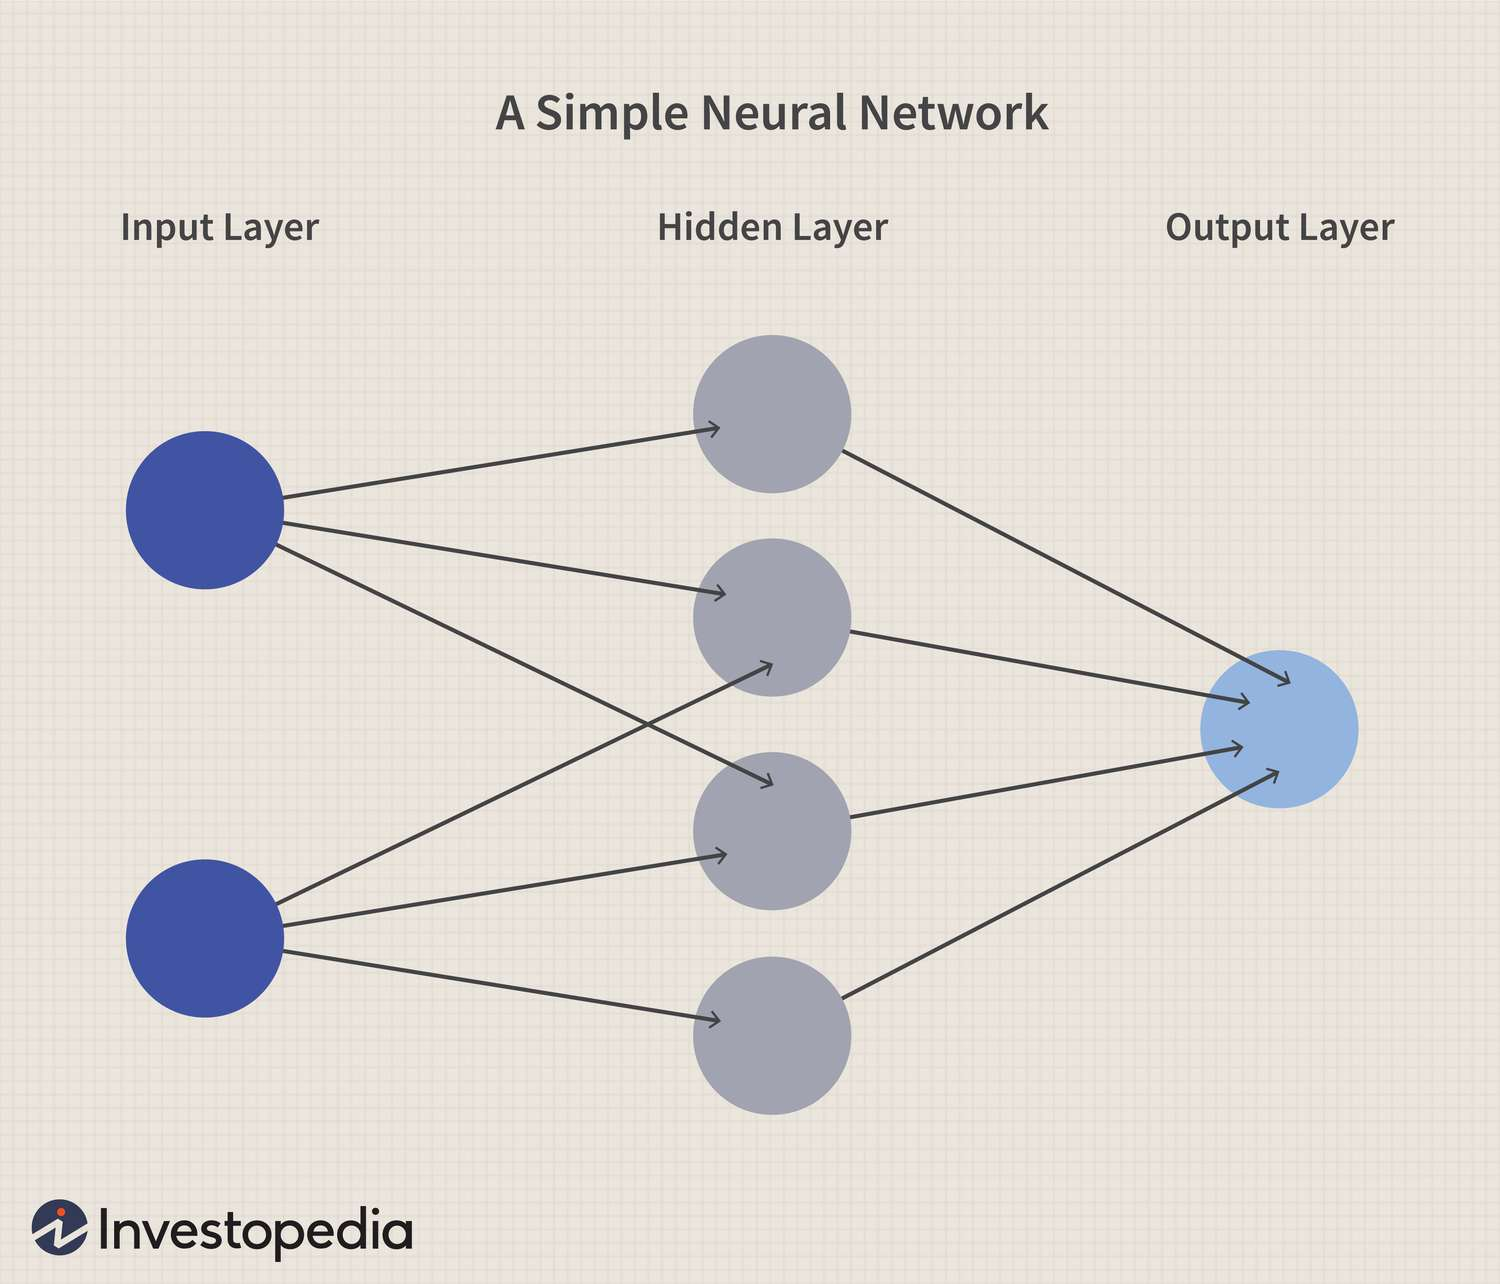
</div>

Neural networks can also have multiple layers, they don't necessarily have to be restricted to only one layer.



<div>
    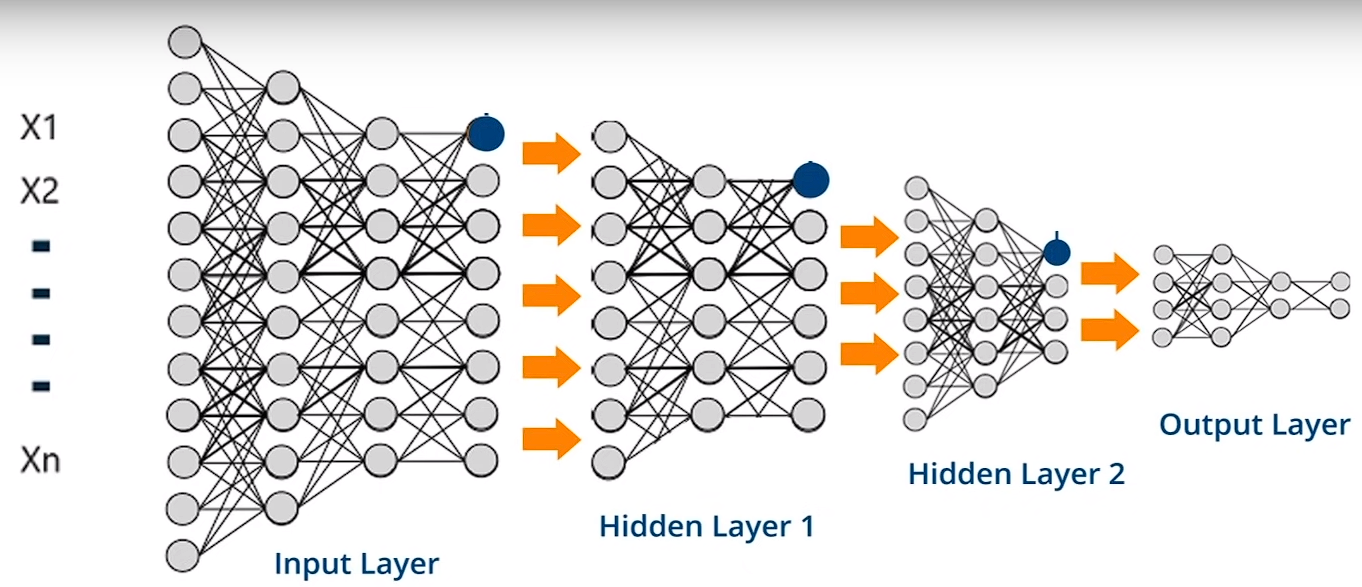
</div>



### AI, ML, Deep Learning, Neural Networks... What's the difference?

There is a lot of confusion regarding these terms, and rightfully so. The following image and explanations aim to hopefully give a clearer picture of some of the distinctions amongst these confusing terms. 




<div display="inline-block">
    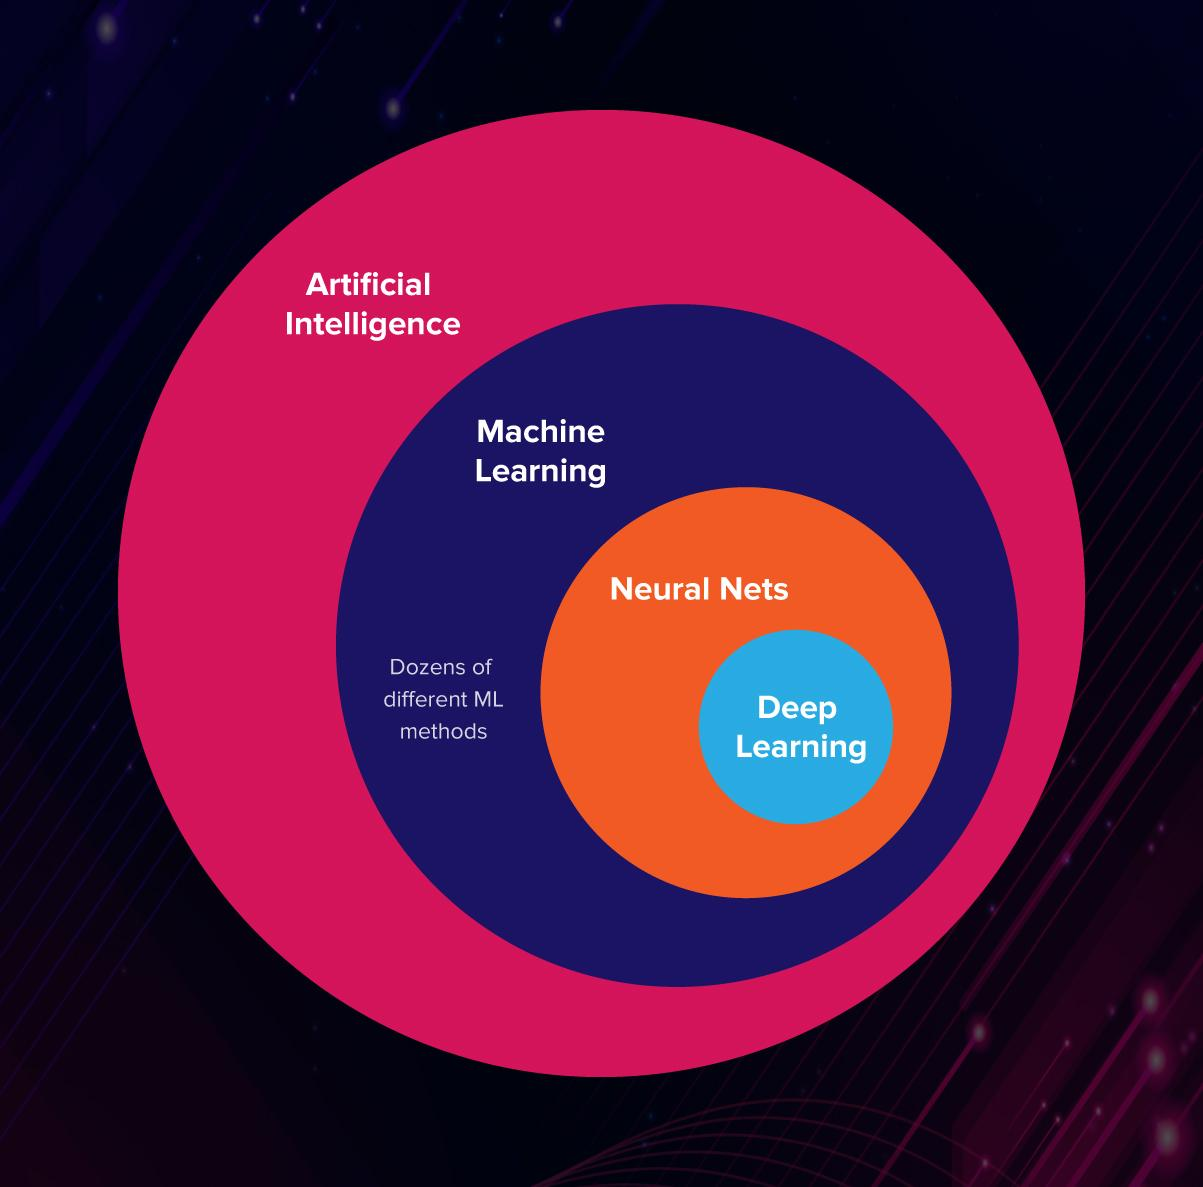
<ul>
<li>AI is the technique which enables machines to mimic human behaviour.</li>
<li>Machine learning (ML) is a subset of AI which ueses statistcial methods to enable machines to imporve, with experience.</li>
<li>Deep learning is a subset of ML which makes the computation of multi-layered neural networks feasible.</li>
</ul>

</div>


A neural network is composed of the following:

1. Input Layer
2. Hidden Layer
3. Output Layer
4. Weights & Bias
5. Activation Function
6. Loss Function


### What are Layers?
- Layers are used to hold the neurons and pass it onto the subsequent layers. Each neuron is a mathematical input. 
- The input layer is the very first layer.
    - We can think of them as a mapping for the features in our dataset. This means that for every feature variable, we have an input layer for them.
    - There are no connections going *to* them, only *outward* from them. 
    - The number of neurons in the input layer equals the number of columns in the dataset. 

- The output layer is the final layer.
    - We can think of the output layer sort of like the predictor. 
    - If we wanted to determine whether an image was a cat or not, we could represent that using 1 single output layer, outputting a value between 0 to 1, representing the probability (or confidence).
    - You will notice that the output layer does not have any connections going out from them, only connections going to them.
    - Whatever number of columns your ```y``` data has, that would be the number of neurons in the output layer.
    
- The middle layer is also known as the hidden layer.
    - Hidden layers do the computational "thinking" of our NN. It allows the model to make more complex decisions, and each layer can be though of as computing some sort of information about the input data. 
    - When actually coding our NN, the input and output layers are determined automatically, so we can't do anything about them. However, we do have some control over the hidden layer, we can specify how many we we want in it. 

### What are Weights & Biases?
- Weights are values associated with the input which decides how much importance that particular input has to calculate the desired output. 
- Bias is a constant value added to the weighted sum of inputs to offset the result.

### What is the Activation Function?
- Activation function computes the output from the weighted sum of the inputs. 
- There can be different types of activation functions, such as sigmoid function, linear function, softmax, and relu. 

### How do NNs work?

Each hidden and output neuron takes in the input (could be singular or could come from multiple sources), multiplies them by their weights, adds them all together, and passes that result to the activation function. The result of the activation function is the output of the neuron itself.  

The activation function is simply a mathematical expression. It could be something as simple as ```f(x) = max(0,x)```, where the activation function would return the larger of two values, 0 or x. 

When a neuron receives some inputs and performs a computation, this is called an **activation** of the neuron.

The weights of certain connections may be greater than others, thus impacting the result of the activation function. Ultimately, the neural network "learns" through the continuous process of updating its weights. The weight value of every connection gradually gets adjusted to make its predictions more accurate.

The model updates its weights by moving them in the direction that decreases model error, and this entire process of updating weights is called backpropagation.

In backpropagation, important info such as accuracy scores get passed back through the layers, and the weights get updated accordingly. 

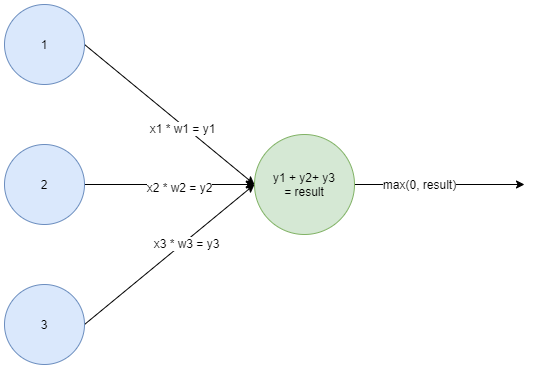

### Why Neural Networks?
- Main benefit is that NNs can learn more complex functions.
- Functions are non-linear in NNs (unlike linear regression).
- Activation functions are what makes the final function non-linear.

In [25]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, balanced_accuracy_score

sklearn.set_config(display='diagram')

In [26]:
data = pd.read_csv('../data/wind_turbines.csv').iloc[:,[0,3,4,5,6,7]]

data.head()

,Site.State,Turbine.Capacity,Turbine.Hub_Height,Turbine.Rotor_Diameter,Turbine.Swept_Area,Turbine.Total_Height
0,IA,3000,87.5,125.0,12271.85,150.0
1,IA,3000,87.5,125.0,12271.85,150.0
2,IA,3000,87.5,125.0,12271.85,150.0
3,IA,3000,87.5,125.0,12271.85,150.0
4,IA,3000,87.5,125.0,12271.85,150.0


In [27]:
X = data.drop(columns=["Turbine.Capacity"])
y = data["Turbine.Capacity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

When it comes to working with neural networks, there are two requirements. 

- All data must be numeric.
- All data should be scaled.

Let's output our X_train data for example, and see what we got. 

In [28]:
X_train

,Site.State,Turbine.Hub_Height,Turbine.Rotor_Diameter,Turbine.Swept_Area,Turbine.Total_Height
38792,KS,80.0,103.0,8332.29,131.4
3366,WV,80.0,77.0,4656.63,118.6
48147,MN,80.0,110.0,9503.32,135.0
63279,IA,75.0,54.0,2290.22,102.1
26060,TX,80.0,87.0,5944.68,123.4
...,...,...,...,...,...
62570,WA,67.0,80.0,5026.55,107.0
38158,WV,70.0,72.0,4071.50,106.1
860,CA,85.0,103.0,8332.29,136.6
15795,IA,105.0,136.0,14526.72,173.1


It appears we have some categorical variables, which is not good! We will use one-hot encoding to address this problem. 

Moreover, our numerical data is not scaled. We can introduce a standard scaler to address this problem. 

Before all of that, let's also output ```data``` quickly to see if we have any missing values, to determine if we need to use an imputer or not. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63961 entries, 0 to 63960
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Site.State              63961 non-null  object 
 1   Turbine.Capacity        63961 non-null  int64  
 2   Turbine.Hub_Height      63961 non-null  float64
 3   Turbine.Rotor_Diameter  63961 non-null  float64
 4   Turbine.Swept_Area      63961 non-null  float64
 5   Turbine.Total_Height    63961 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ MB


There are a total of 63961 rows, and each column has exactly 63961 values. This means there are no missing values, and an imputer won't be necessary. 

Let's proceed with one-hot encoding and scaling our data now. We can separate what variables need to be one-hot encoded (categorical variables) and what variables need to be scaled (numerical variables).

In [6]:
numeric_features = list(X_train.iloc[:, 1:].columns.values)
categorical_features = ['Site.State']

numeric_features

['Turbine.Hub_Height',
 'Turbine.Rotor_Diameter',
 'Turbine.Swept_Area',
 'Turbine.Total_Height']

In [7]:
len(data['Site.State'].unique())

44

Now that we have separated the numeric features from the categorical ones, we can begin creating the transformation objects that we wish to apply.

More specifically, we wish to apply a ```StandardScaler``` to our numerical columns, and ```OneHotEncoder``` to the categorical columns. 

In [8]:
ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
)

ct

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Turbine.Hub_Height',
                                  'Turbine.Rotor_Diameter',
                                  'Turbine.Swept_Area',
                                  'Turbine.Total_Height']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Site.State'])])

### Preparing Our Model

Now that we have our preprocessing object (ct for column-transformer), we can put it in a pipeline with the NN we're about to create. 

In sklearn, their supervised feedforward NN offerings are known as MLP, which stands for multi-layer perceptron (it's just another name for feedforward NNs).

Since feedforward NNs are supervised, we can perform regression ```MLPRegressor``` or classification ```MLPClassifier```. 

We will be using ```MLPRegressor``` since we're trying to predict the numerical value of the electrical output of turbines. This is a continuous value. 

In [29]:
neural_net = MLPRegressor(
    hidden_layer_sizes=(10), # Single hidden layer with 10 neurons/nodes in it 
    max_iter=2000,
    learning_rate_init=0.03,
    random_state=42
    )

turbine_model = make_pipeline(ct, neural_net)
turbine_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Turbine.Hub_Height',
                                                   'Turbine.Rotor_Diameter',
                                                   'Turbine.Swept_Area',
                                                   'Turbine.Total_Height']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Site.State'])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=10, learning_rate_init=0.03,
                              max_iter=2000, random_state=42))])

Two very important parameters are the ```max_iter``` and ```learning_rate_init``` parameters. 

These two combined together can solve any potential ```ConvergenceWarning``` messages, which means that our model did not find an optimal solution to the problem. In other words, the model did not converge. 

This could be caused by too little iterations/cycles. The model was not given enough opportunities to perform the computation it needed to. An iteration is when the model is shown all training examples, and backpropagation is used to update the model for each example. The default value for ```max_iter``` is 200, so if you're getting a ```ConvergenceWarning```, 200 iterations may not be enough, and you need to increase that value. Under the hood, our model went through every single training example 200 times, and still could not find an optimal solution.  


However, you may soon find out that increasing the ```max_iter``` value is not enough to solve the problem. The issue here is that our model is actually **not learning fast enough**. 

This is where the ```learning_rate_init``` argument comes in. 
|
According to the scikit-learn documentation, the ```learning_rate_init``` parameter controls the step-size in updating the weights. Its default value is 0.001. In other words, the learning rate dictates how much the model changes each weight, for every training example it sees.

So then you might be wondering, why not just give a very large number? Well, the issue is that if the learning rate is **too** large, then there is a risk that the model might jump over the optimal value for the given weight. 

We need to find a balance where our model learns quick enough so that it converges, but not so quick that it jumps over/past the optimal value, in terms of the weights. 

If you don't know what value to use for the learning rate, try to the following pattern: 0.0001 -> 0.0003 -> 0.001 -> 0.003 -> 0.01 -> 0.03 -> 0.1 -> 0.3, and so on.

Lastly, the ```hidden_layer_sizes``` argument controls how many hidden/middle layers we wish to create. Since the input and output layers are automatically defined, we have no control over that. However, we do have control over what the middle layers look like. 

The syntax is simple, each layer are separated by columns, with a number designating the number of neurons in that particular layer. 

Sometimes it is worth to decrease the amount of hidden layers, as the tradeoff between loss of accuracy is worth it for the drastically improved training time. For example, if 100 hidden layers takes the model 30s to initiate with 93% accuracy, then 10 layers may be worth it, because it takes 5s with 92% accuracy. 

After understanding those parameters and tweaking their values within our model, we are ready to do training on it. As complicated as NNs may seem, we treat it just like any other ML model, we we use the ```fit``` function on our training data. 

Please note that the training process below may take some time, depending on how large your dataset is and how many neurons and layers were specified for the hidden layer.

Another reason why NNs take such a long time is because of the backpropagation process. 

In [30]:
turbine_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Turbine.Hub_Height',
                                                   'Turbine.Rotor_Diameter',
                                                   'Turbine.Swept_Area',
                                                   'Turbine.Total_Height']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Site.State'])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=10, learning_rate_init=0.03,
                              max_iter=2000, random_state=42))])

To get a sense of the performance of our NN, we can call the ```score``` function, which for numerical data, ```MLPRegressor``` uses the R2 scoring method (by defualt). 

In [31]:
turbine_model.score(X_test, y_test)

0.8714000561229741

### Comparing NNs to Linear Regression

When compared to linear regression, NN would give a higher R2 score. 

Moreover, when using linear regression, there a lot more steps involved. We needed to first figure out what kind of shape the data is through PCA, then actually transform our data according to that shape.

With a NN though, the model figures out all that stuff for us during training, and it even provides a better score! 

This is because linear regression is a linear model, which means it can only capture linear relationships between the input features and the output. On the other hand, NNs have the ability to learn complex non-linear relationships. 

However, the one advantage that linear regression has over NNs is the training time is faster, because their model is simpler. 

### Introspecting our Model

**How can we determine the number of Input Neurons we have?**

Recall that the number of input neurons corresponds to the number of features in our dataset, after column transformations have been applied to it.  

In [12]:
# Method 1: Looking at the shape of our CT
print(ct.transform(X).shape)

# Method 2: Taking the entire pipeline that we have, and looking at everything up until the final step (which is your MLPRegressor model). 
# (Particualrly useful if you have multiple column transformers in your pipeline).
turbine_model[:-1].transform(X).shape

(63961, 48)


(63961, 48)

In [13]:
turbine_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Turbine.Hub_Height',
                                                   'Turbine.Rotor_Diameter',
                                                   'Turbine.Swept_Area',
                                                   'Turbine.Total_Height']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Site.State'])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(10,), learning_rate_init=0.03,
                              max_iter=2000, random_state=42))])

**How can we determine the number of Output Neurons we have?**

To get the number of output neurons, we can use ```n_outputs``` on our NN model, which we named neural_net. 

In [14]:
neural_net.n_outputs_

1

Since we aim to predict the turbine output as a single continuous value, our model utilizes only one output neuron.

Tip: If you're unsure of what attributes an object has an python, use use the ```dir()``` function. As you can see below, we can spot the ```n_outputs_``` attribute. 

In [15]:
print((dir(neural_net)))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_backprop', '_check_feature_names', '_check_n_features', '_check_solver', '_compute_loss_grad', '_estimator_type', '_fit', '_fit_lbfgs', '_fit_stochastic', '_forward_pass', '_forward_pass_fast', '_get_param_names', '_get_tags', '_init_coef', '_initialize', '_loss_grad_lbfgs', '_more_tags', '_no_improvement_count', '_optimizer', '_random_state', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_unpack', '_update_no_improvement_count', '_validate_data', '_validate_hyperparameters', '_validate_input', 'activation', 'alpha', 'batch_size', 'best_loss_', 'beta_1', 'beta_2', 'co

Additionally, examining the number of iterations our model underwent during training can prove beneficial when trying to decide the ideal value for the learning rate and the maximum iteration threshold.

Often times, the NN won't actually reach the number specified in the ```max_iter``` argument. Most of the time, it's much much less.

In [16]:
num_iterations = neural_net.n_iter_
num_iterations

123

The above number can be interpreted as the following: Our NN model looked at every training example 123 times, and at that point is when the model decided that the weights were at the optimal point. 

If you like, feel free to go back to the ```max_iter``` argument and lower it's value. A value anywhere from 500-1000 is reasonable. 

Also play around with the learning rate! A higher learning rate allows you to decrease the number of iterations. 

### Weights of our NN

We can also look at the final weights our model decided on.

The information will be presented as an array of arrays. 

In [43]:
weights = turbine_model.named_steps.mlpregressor.coefs_
weights

[array([[-5.77391176e+000,  6.65176640e+000, -1.34361774e+000,
         -1.14147269e-016, -4.00475896e+000,  2.86411410e+000,
         -5.16209520e+000,  1.77000949e-017, -5.74575754e-001,
          2.26537056e+000],
        [ 1.40826958e+001,  1.09362479e+001, -1.82818485e+001,
         -8.53223796e-018,  1.42997385e+001, -5.29503353e-001,
         -2.77441671e+000,  5.38942391e-020,  1.09768190e+001,
          7.36788728e-001],
        [ 1.15326509e+001,  8.00692168e+000, -2.93851692e+001,
          2.39847872e-016,  1.12922007e+001, -1.37213044e+000,
         -2.19257679e+001,  5.25303340e-018,  8.61296745e+000,
          3.13731223e+000],
        [ 5.58017339e+000,  9.25811244e+000, -7.75547122e+000,
          8.30373205e-018,  6.82993918e+000,  9.22587617e-001,
         -8.76768981e+000, -7.01106958e-018,  6.19138928e+000,
          1.06905610e+000],
        [ 9.37479365e+000,  1.02174626e+001, -1.15590851e+001,
         -2.56111815e-311,  9.40440051e+000,  4.63103220e+000,
      

In [18]:
len(weights)

2

As you can see, there are two main arrays. One group is responsible for the weights from the input layer to hidden layer, and the other is for hidden layer to output layer.

In [19]:
# weights[0] input layer to hidden layer
# weights[1] hidden layer to output layer

### Interpreting this Array

How can we understand these arrays given to us? 

Let's take a look at ```weights[0]``` first, which is responsible for the weights going from the input layer to the hidden layer. 

The number of sub-arrays represents the number of input neurons, and the number of elements within each sub-array represents the number of hidden neurons. For example, ```len(weights[0])``` would tell us how many sub-arrays there are (there's 48), which means we have 48 input neurons. This checks out because we have 48 features in our dataset (after transformations applied), which we verified above.

Next, we can count the number of elements in each individual sub-array by hand. There's 10, meaning that there's 10 hidden layers... exactly what we specified in the ```hidden_layer_sizes``` argument!

Since each input neuron gets its own array that's the same size, this entails that each input neuron has a connection to every neuron in the hidden layer. 

In [20]:
len(weights[0])

48

When taking a look at the hidden layer to output layer, we have 10 sub-arrays, indicating 10 neurons in the hidden layer, and since each sub-array has a length of 1, we have 1 output neuron, which matches the ```n_outputs_``` attribute. 

### Your Turn!

Draw out our neural network, paying close attention to the input, hidden, and output layers.  

### The Loss Curve

The loss curve is a graphical representation of how the loss or error of an ML model changes over the course of training. The loss function measures the discrepancy between the predicted output of the model and the actual target values in the training data. As the model is being trained, it attempts to minimize this loss by adjusting its parameters.

Basically, the loss curve tells us the error of our model at each iteration. 

For every iteration our model takes, there is a loss value. If the loss value decreases as the number of iterations progresses, that means our model is learning.

In [40]:
loss_curve = neural_net.loss_curve_
print(loss_curve)

[1229821.674033823, 96297.02969709961, 46684.136247490766, 38206.28940547069, 35784.30208885161, 34652.986668587575, 33900.51840179097, 33268.69379537902, 32816.87966335021, 32469.111635193432, 32199.95096392473, 31983.834636267162, 31788.303486757824, 31642.55693686228, 31532.464100948193, 31426.286077105226, 31320.800353729795, 31291.358227035034, 31261.360038789247, 31178.440670719385, 31150.16969508117, 31150.986542394287, 31083.00025129401, 31060.49240169351, 31056.592253904637, 31009.81419941784, 30976.457469418656, 30984.194817732667, 30922.282027317055, 30945.893063899854, 30910.308375900844, 30928.05969228657, 30888.86991591098, 30897.155915315885, 30870.33001706253, 30874.872899903636, 30860.2592722723, 30800.68686013714, 30785.311532612523, 30818.57561126891, 30806.36499295224, 30756.17621260926, 30791.504577079217, 30732.677528748314, 30734.208388734405, 30737.025375438807, 30723.42630468224, 30674.659434514695, 30691.268159931114, 30658.76022472014, 30623.04335103185, 3062

In [22]:
print(len(loss_curve) == num_iterations) # Number of loss curve values equals the number of iterations

True


<AxesSubplot: >

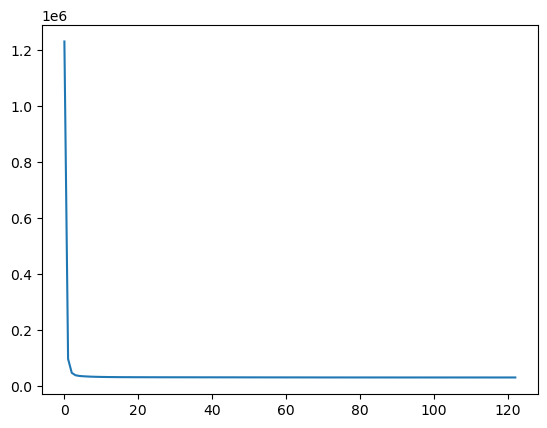

In [23]:
pd.Series(loss_curve).plot.line()

What we see from the above graph is that the error initially was quite high (around 1,000,000), but then quickly dropped after a few couple iterations. 

Let's check the last 60 iterations to see how our loss values are changing. 

<AxesSubplot: >

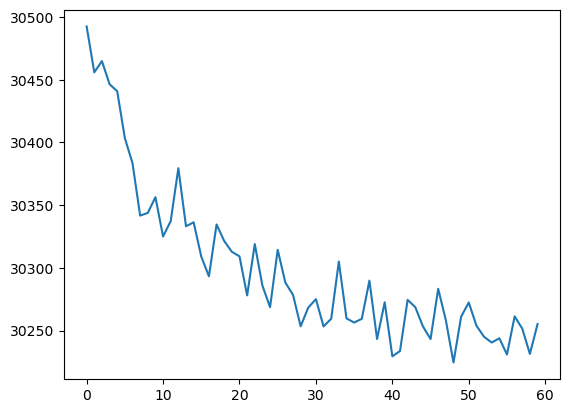

In [24]:
pd.Series(loss_curve[-60:]).plot.line()

### So then how do we know when our model should stop? (In other words, how does the model determine the number of iterations it takes (in this case, 123))

Our model will know when to stop depending on configurations of the ```tol``` (tolerance) and ```n_iter_no_change``` (number of iterations without change) parameters within the MLPRegressor model. 

These numbers may be confusing at first but the functionality is quite simple: When the loss is not improving by a certain amount specified by ```tol``` for ```n_iter_no_change``` number of consecutive iterations, then convergence is considered to have been reached and the training stops. 

For example, if I had a ```tol``` value of 5 and ```n_iter_no_change``` of 10, then I would be saying if the loss value is not decreasing by at least 5 for the next 10 consecutive iterations, then the model has reached convergence. Keep in mind that for the next 10 cycles, loss must decrease by at least 5 each time. 